<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/adult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['Age', 'ClaseOfWork', 'Continue', 'Education', 'educacion-num', 'EstadoCivil', 'Ocupation', 'Relacion',
           'Raza', 'Sex', 'Capital-Ganancia', 'PerdidaCapital', 'Horas por semana', 'Pais Nativo', 'Target']
adult = pd.read_csv(r'https://gist.githubusercontent.com/gghatano/128e45603b3a133f0fd46a8f262cb65a/raw/372169cae43c9213ac00312cd9672922cb9c7ffc/adult.csv', header=None)

adult.columns =  columns

adult.head()

,Age,ClaseOfWork,Continue,Education,educacion-num,EstadoCivil,Ocupation,Relacion,Raza,Sex,Capital-Ganancia,PerdidaCapital,Horas por semana,Pais Nativo,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


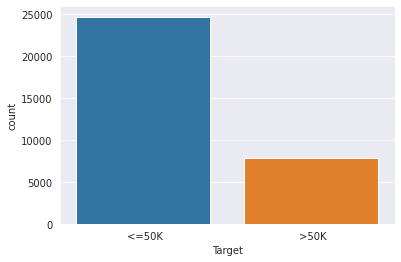

In [11]:
adult.Target.value_counts()

sns.set_style(style='darkgrid')
sns.countplot(x=adult.Target, data=adult)


In [16]:
adult.groupby(adult.Target).mean()

,Age,Continue,educacion-num,Capital-Ganancia,PerdidaCapital,Horas por semana
Target,,,,,,
<=50K,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210
>50K,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026


Text(0.5, 1.0, 'FREQUENCY OF TARGET ACCORDING NATIVE COUNTRY')

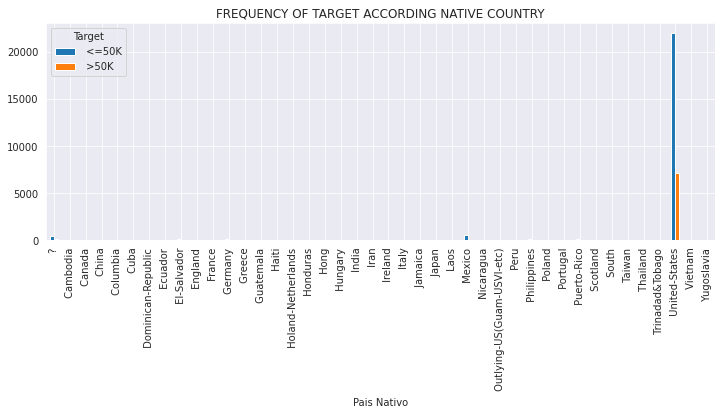

In [23]:
pd.crosstab(adult['Pais Nativo'], adult.Target).plot(kind='bar', figsize=(12,4))
plt.title('FREQUENCY OF TARGET ACCORDING NATIVE COUNTRY')

Percentage of males target 1: 66.92%
Percentage of females target 1: 33.08%


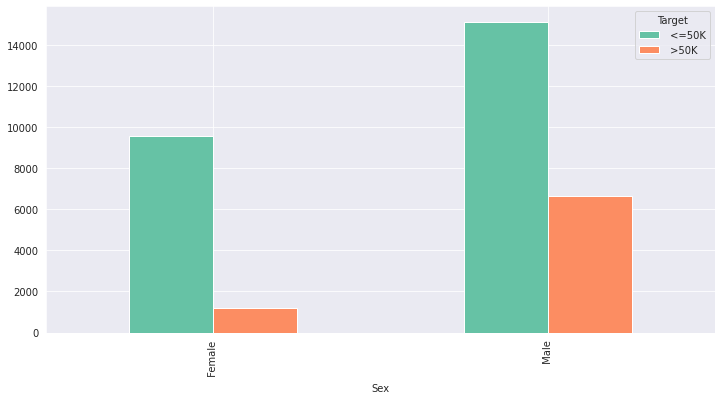

In [40]:
q_male = ( len(adult[adult.Sex == ' Male']) / len(adult) ) * 100
q_female = ( len(adult[adult.Sex == ' Female']) / len(adult) ) * 100

print('Percentage of males target 1: {:.2f}%'.format(q_male))
print('Percentage of females target 1: {:.2f}%'.format(q_female))

sns.set_palette('Set2')
pd.crosstab(adult.Sex, adult.Target).plot(kind='bar', figsize=(12,6))
plt.show()

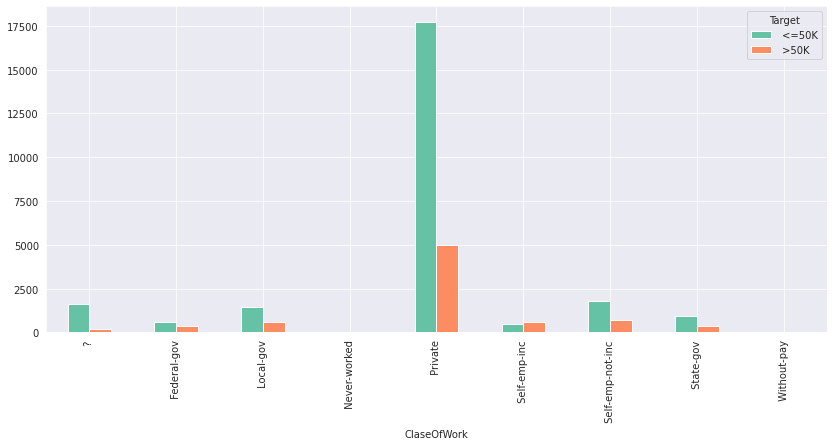

In [43]:
pd.crosstab(adult.ClaseOfWork, adult.Target).plot(kind='bar', figsize=(14,6))

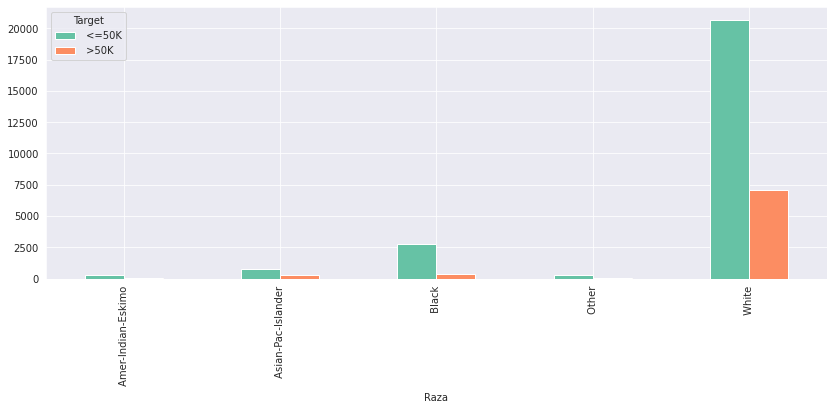

In [61]:
pd.crosstab(adult.Raza, adult.Target).plot(kind='bar', figsize=(14,5))

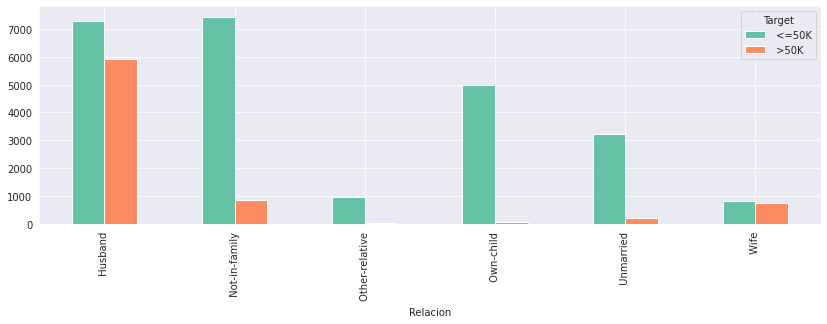

In [64]:
pd.crosstab(adult.Relacion, adult.Target).plot(kind='bar', figsize=(14,4))

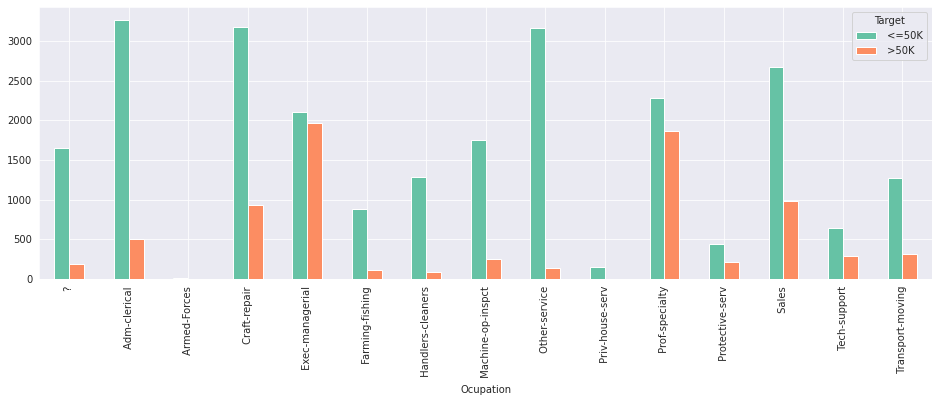

In [69]:
pd.crosstab(adult.Ocupation, adult.Target).plot(kind='bar', figsize=(16,5))

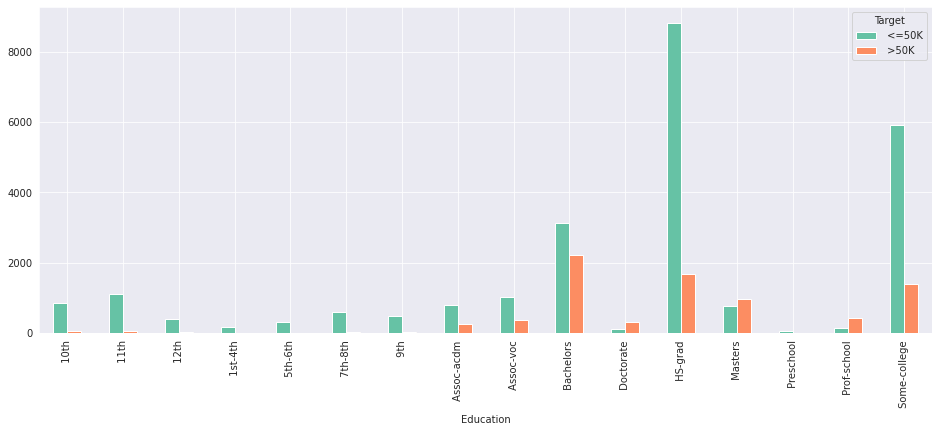

In [85]:
pd.crosstab(adult.Education, adult.Target).plot(kind='bar', figsize=(16,6))

In [231]:
# get dummies features
'''
data = pd.read_csv(r'https://gist.githubusercontent.com/gghatano/128e45603b3a133f0fd46a8f262cb65a/raw/372169cae43c9213ac00312cd9672922cb9c7ffc/adult.csv', header=None)
data.columns =  columns

target = pd.get_dummies(data.Target, prefix_sep='target',dtype=int)
target = target.loc[:, ' >50K']
sex = pd.get_dummies(data.Sex, prefix_sep='Sex', dtype=int)
sex = sex.loc[:, ' Male']

data.drop(labels=['Education', 'EstadoCivil', 'Capital-Ganancia', 'PerdidaCapital', 'Sex', 'Target'],axis=1, inplace=True)


data.head()
'''

,Age,ClaseOfWork,Continue,educacion-num,Ocupation,Relacion,Raza,Horas por semana,Pais Nativo
0,39,State-gov,77516,13,Adm-clerical,Not-in-family,White,40,United-States
1,50,Self-emp-not-inc,83311,13,Exec-managerial,Husband,White,13,United-States
2,38,Private,215646,9,Handlers-cleaners,Not-in-family,White,40,United-States
3,53,Private,234721,7,Handlers-cleaners,Husband,Black,40,United-States
4,28,Private,338409,13,Prof-specialty,Wife,Black,40,Cuba


In [242]:
'''
for i, x in enumerate(data['Pais Nativo']):

  if x == ' Mexico' or x == ' ?':

    data['Pais Nativo'][i] = 1
  
  if x == ' United-States':

    data['Pais Nativo'][i] = 2

  else:

    data['Pais Nativo'][i] = 0
    '''

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [300]:
from sklearn.impute import SimpleImputer
'''
imputer = SimpleImputer(missing_values=' Exec-managerial', strategy='constant', fill_value=14, copy=True)

imputer = imputer.fit(data.loc[:, 'Ocupation'][:,np.newaxis])

data.Ocupation = imputer.transform(data.loc[:, 'Ocupation'][:,np.newaxis])
'''
data.Ocupation.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys


13    4140
11    4099
14    4066
10    3770
12    3650
4     3295
7     2002
5     1843
9     1597
2     1370
3      994
8      928
6      649
1      149
0        9
Name: Ocupation, dtype: int64

In [326]:
frames = (data, sex)

X = pd.concat(frames, axis=1)
y = target

X.Continue = (((X.Continue - np.mean(X.Continue)) / (np.max(X.Continue) - np.min(X.Continue))) * 4 -2)


,Age,ClaseOfWork,Continue,educacion-num,Ocupation,Relacion,Raza,Horas por semana,Pais Nativo,Male
0,39,1,-2.304974,13,10,2,2,40,2,1
1,50,2,-2.289231,13,14,3,2,13,2,1
2,38,3,-1.929728,9,2,2,2,40,2,1
3,53,3,-1.877908,7,2,3,1,40,2,1
4,28,3,-1.596228,13,13,2,1,40,0,0


In [337]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

nn = np.arange(1, 50)

train_score = []
test_score = []

for _ in nn:

  knn = KNeighborsClassifier(n_neighbors=_).fit(X_train, y_train)

  train_score.append(knn.score(X_train, y_train))
  test_score.append(knn.score(X_test, y_test))


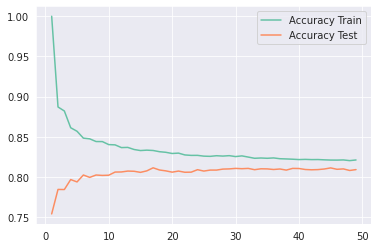

In [338]:
plt.plot(nn, train_score, label='Accuracy Train')
plt.plot(nn, test_score, label='Accuracy Test')
plt.legend(loc=1)

In [344]:
_X = pd.concat(frames, axis=1)

_X = ((_X - np.mean(_X)) / (np.max(_X) - np.min(_X)))
_X

X_t, X_v, y_t, y_v = train_test_split(_X, y, random_state=1)

sTrain = []
sTest = []

for _ in nn:

  knn = KNeighborsClassifier(n_neighbors=_).fit(X_t, y_t)

  sTrain.append(knn.score(X_t, y_t))
  sTest.append(knn.score(X_v, y_v))




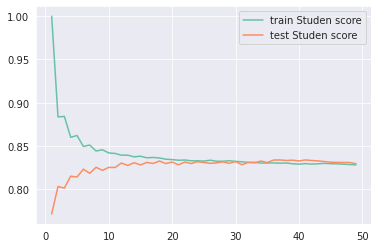

In [345]:
plt.plot(nn, sTrain, label='train Studen score')
plt.plot(nn, sTest, label='test Studen score')
plt.legend(loc='best')

In [346]:
_X.to_csv('StudenAdult.csv', index=False)

In [351]:
X_ = pd.concat(frames, axis=1)

X_ = ((X_ - np.min(X_)) / (np.max(X_) - np.min(X_)))

Xt, Xv, yt, yv = train_test_split(X_, y, random_state=2)

trainK = []
testK = []

for _ in nn:

  knn = KNeighborsClassifier(n_neighbors=_).fit(Xt, yt)

  trainK.append(knn.score(Xt, yt))
  testK.append(knn.score(Xv, yv))


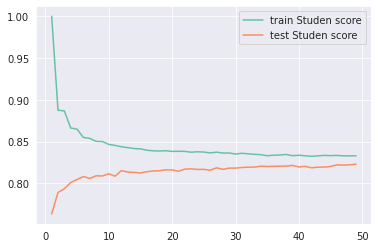

In [352]:
plt.plot(nn, trainK, label='train Studen score')
plt.plot(nn, testK, label='test Studen score')
plt.legend(loc='best')

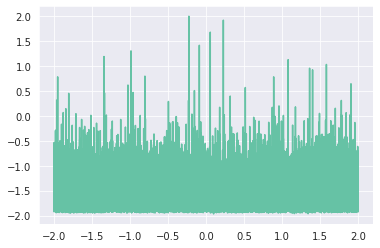

In [194]:
np.min((data.Continue / np.max(data.Continue)) * 4 - 2)
plt.plot(np.linspace(-2,2, 32561), ((data.Continue / np.max(data.Continue)) * 4 - 2))

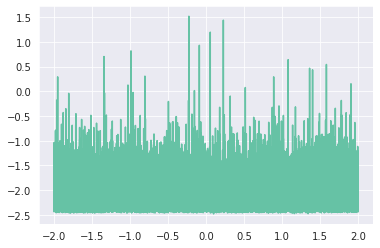

In [188]:
(data.Continue - np.mean(data.Continue)) / (np.max(data.Continue) - np.min(data.Continue)) * 4 -2

plt.plot(np.linspace(-2,2, len(data.Continue)), (data.Continue - np.mean(data.Continue)) / (np.max(data.Continue) - np.min(data.Continue)) * 4 -2)

-3.519296961703991e-17